In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [18]:
# from matplotlib import interactive
# import mpld3
# interactive(True)
%matplotlib inline
# mpld3.enable_notebook()

In [3]:
p_num = 1

In [4]:
original_df = pd.read_csv(r'C:\Users\james\Documents\Hishtalmut_Kamdan\Targil 1 - Data Visualiztion\My - Home Credit Default Risk.csv')

In [5]:
original_df.drop(columns=['Unnamed: 0'], inplace=True)

## Finding anomaly by z-score

In [ ]:
data_z_score = pd.DataFrame()
for i in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'OWN_CAR_AGE']:
        data_z_score[i] = (original_df[i]-original_df[i].mean())/original_df[i].std()#ddof=0

data_z_score.plot()
plt.suptitle("Z-Score of all Features", fontsize=10)
plt.xlabel("Sample",fontdict={'fontsize': 5})
plt.ylabel("Z-Score",fontdict={'fontsize': 5})
plt.legend(["Feature - " + str(x) for x in data_z_score.columns],prop={'size': 15})
# plt.figure(figsize=(500,250), forward)
fig = plt.gcf()
fig.set_size_inches(25,25,forward=False)
p_num+=1

## Gaussian Mixture Models

### fillna

In [28]:
df_preprocessed = original_df.fillna(method='ffill')

In [29]:
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
SK_ID_CURR                    200 non-null int64
TARGET                        200 non-null int64
NAME_CONTRACT_TYPE            200 non-null object
NAME_TYPE_SUITE               200 non-null object
NAME_INCOME_TYPE              200 non-null object
NAME_EDUCATION_TYPE           200 non-null object
NAME_FAMILY_STATUS            200 non-null object
NAME_HOUSING_TYPE             200 non-null object
OCCUPATION_TYPE               200 non-null object
WEEKDAY_APPR_PROCESS_START    200 non-null object
ORGANIZATION_TYPE             200 non-null object
FONDKAPREMONT_MODE            198 non-null object
HOUSETYPE_MODE                198 non-null object
WALLSMATERIAL_MODE            198 non-null object
CODE_GENDER                   200 non-null int64
FLAG_OWN_CAR                  200 non-null int64
FLAG_OWN_REALTY               200 non-null int64
CNT_CHILDREN                  196 non-null float64

In [30]:
df_preprocessed[df_preprocessed['CNT_CHILDREN'].isnull()] = df_preprocessed[df_preprocessed['CNT_CHILDREN'].isnull()].fillna(0)

### Run Gaussian Mixture model

In [31]:
types_df = df_preprocessed.dtypes.reset_index()
cols_list = list(types_df['index'][types_df[0]!='object'])

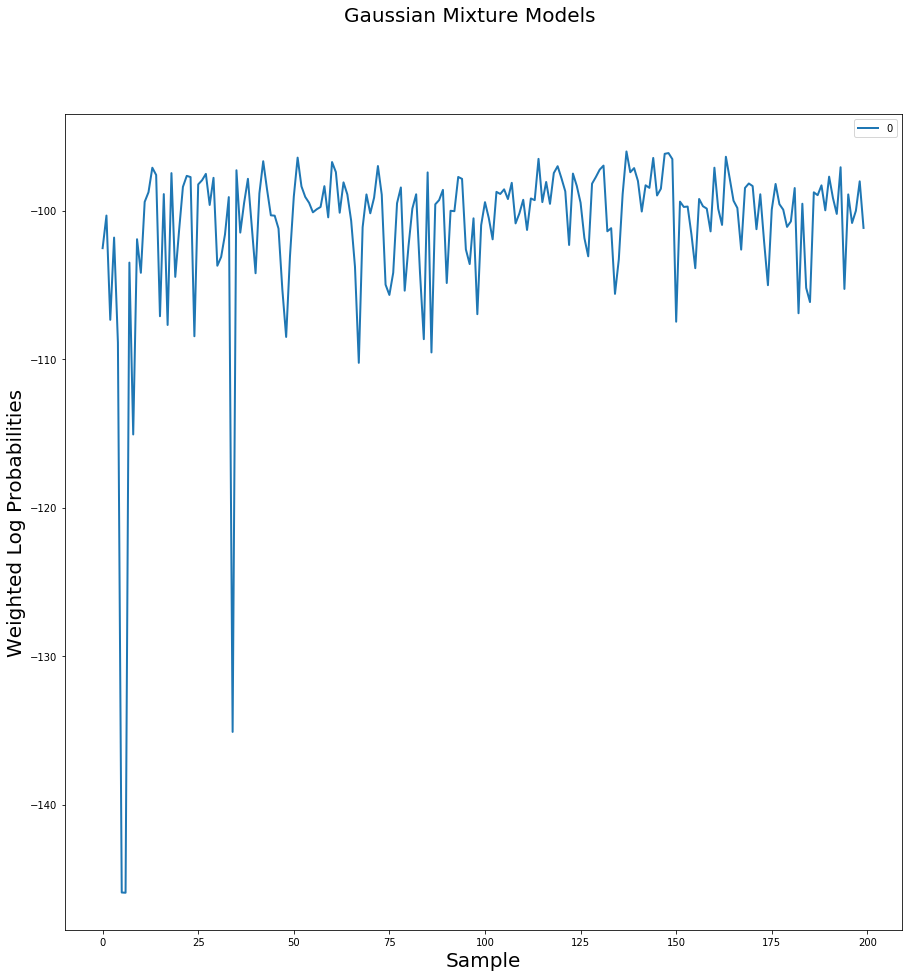

In [32]:
gau = GaussianMixture(n_components=1)
features = df_preprocessed[cols_list]
gau_score = gau.fit(features)
gau_score = gau.score_samples(features)
gau_score = pd.DataFrame(gau_score)
gau_score.plot(linewidth=2)
plt.suptitle("Gaussian Mixture Models", fontsize=20)
plt.xlabel("Sample",fontdict={'fontsize': 20})
plt.ylabel("Weighted Log Probabilities",fontdict={'fontsize': 20})
fig = plt.gcf()
fig.set_size_inches(15,15,forward=False)
p_num+=1

## PCA

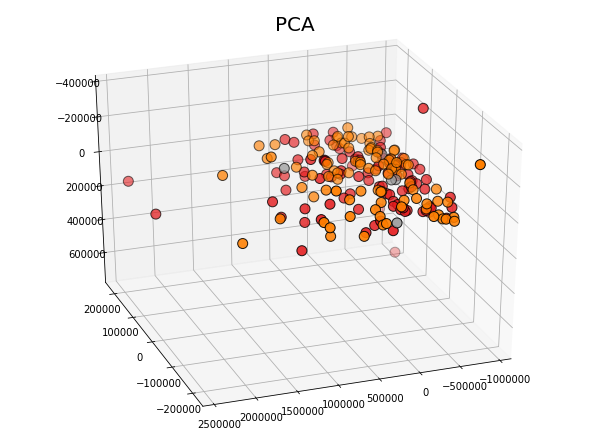

In [19]:
pca = PCA(n_components=3)
features = df_preprocessed.drop(['TARGET'],axis=1)
labels = df_preprocessed['TARGET']

pca_projecrion = pca.fit_transform(features)

pca_projecrion = pd.DataFrame(pca_projecrion)
fig = plt.figure(p_num, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca_projecrion[[0]], pca_projecrion[[1]], pca_projecrion[[2]], c=list(labels.values),cmap=plt.cm.Set1, edgecolor='k', s=100)
plt.suptitle("PCA", fontsize=20)
plt.show()
p_num+=1

## Hirerchical Clustering

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

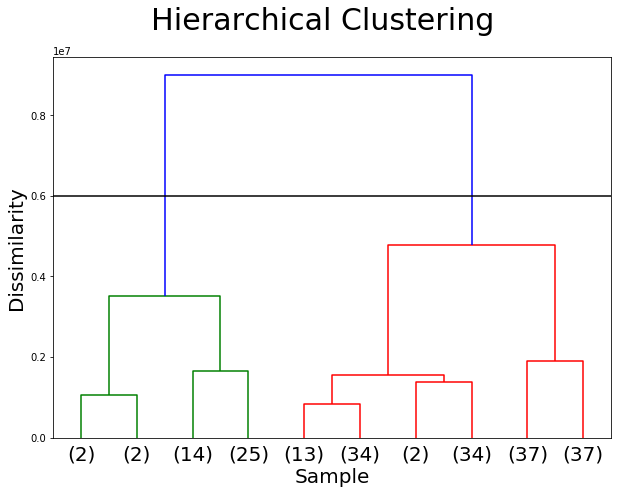

In [27]:
linked = linkage(features, 'ward')
max_d = 6000000

plt.figure(p_num,figsize=(10, 7))  
dendrogram(linked,orientation='top'
           ,distance_sort='descending'
           ,show_leaf_counts=True,leaf_font_size = 20,color_threshold = max_d,truncate_mode='lastp',p=10)
plt.axhline(y=max_d, c='k')
plt.suptitle("Hierarchical Clustering", fontsize=30)
plt.xlabel("Sample",fontdict={'fontsize': 20})
plt.ylabel("Dissimilarity",fontdict={'fontsize': 20})
plt.show()  
p_num+=1